# The Battle of Neighborhoods

### 1. Importing libraries

In [75]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


### 2. Getting Toronto coordinates

In [76]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### 3. Setting Foursquare API credentials

In [77]:
CLIENT_ID = '5NDAMAT4V3J1C3UKFQMMA5KANU2XSZSB0FO42IN4TGAMY2OD' # your Foursquare ID
CLIENT_SECRET = 'JLTHICT3DWCAVHGBYV3JNEBQUGDQDJC4WBLDPSM5NCWM2DGI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: 5NDAMAT4V3J1C3UKFQMMA5KANU2XSZSB0FO42IN4TGAMY2OD
CLIENT_SECRET:JLTHICT3DWCAVHGBYV3JNEBQUGDQDJC4WBLDPSM5NCWM2DGI


### 3.1 Getting the Foursquare API data for Toronto


In [78]:
LIMIT = 100
radius = 10000

categoryId = "4bf58dd8d48988d1d3941735"

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=5NDAMAT4V3J1C3UKFQMMA5KANU2XSZSB0FO42IN4TGAMY2OD&client_secret=JLTHICT3DWCAVHGBYV3JNEBQUGDQDJC4WBLDPSM5NCWM2DGI&v=20180605&ll=43.6534817,-79.3839347&radius=10000&limit=100&categoryId=4bf58dd8d48988d1d3941735'

In [ ]:
results = requests.get(url).json()
results

### 3.2 Transforming the .json file into a Pandas Dataframe

In [80]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [81]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


100 venues were returned by Foursquare.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


### 4. Data Cleaning for the Toronto Foursquare data
For some reason, even though I set the category type to be only "Vegetarian / Vegan Restaurant", the data we got have other types of restaurants. It's our job to clean it and make it so only Vegetarian and Vegan restaurants are shown.

In [82]:
nearby_venues.head(50)

,name,categories,lat,lng
0,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758
1,Fresh On Front,Vegetarian / Vegan Restaurant,43.647815,-79.374453
2,Karine's,Vegetarian / Vegan Restaurant,43.653699,-79.390743
3,Rosalinda,Vegetarian / Vegan Restaurant,43.650252,-79.385156
4,Fresh On Spadina,Vegetarian / Vegan Restaurant,43.648048,-79.396008
5,Hibiscus,Vegetarian / Vegan Restaurant,43.655454,-79.402439
6,Saigon Lotus Restaurant,Vegetarian / Vegan Restaurant,43.654311,-79.399225
7,Urban Herbivore,Vegetarian / Vegan Restaurant,43.656193,-79.402673
8,Kupfert & Kim,Vegetarian / Vegan Restaurant,43.647944,-79.396121
9,Fresh on Bloor,Vegetarian / Vegan Restaurant,43.666755,-79.403491


We will filter it by getting a dataframe where the only value accepted in the 'categories' column is 'Vegetarian / Vegan Restaurant'.

In [84]:
nearby_venues_filtered = nearby_venues[nearby_venues['categories'] == 'Vegetarian / Vegan Restaurant']

print(nearby_venues_filtered.shape)

nearby_venues_filtered.head(50)

(82, 4)


,name,categories,lat,lng
0,Vegetarian Haven,Vegetarian / Vegan Restaurant,43.656016,-79.392758
1,Fresh On Front,Vegetarian / Vegan Restaurant,43.647815,-79.374453
2,Karine's,Vegetarian / Vegan Restaurant,43.653699,-79.390743
3,Rosalinda,Vegetarian / Vegan Restaurant,43.650252,-79.385156
4,Fresh On Spadina,Vegetarian / Vegan Restaurant,43.648048,-79.396008
5,Hibiscus,Vegetarian / Vegan Restaurant,43.655454,-79.402439
6,Saigon Lotus Restaurant,Vegetarian / Vegan Restaurant,43.654311,-79.399225
7,Urban Herbivore,Vegetarian / Vegan Restaurant,43.656193,-79.402673
8,Kupfert & Kim,Vegetarian / Vegan Restaurant,43.647944,-79.396121
9,Fresh on Bloor,Vegetarian / Vegan Restaurant,43.666755,-79.403491


Done! Now that we've got our data cleaned, let's put it to use!

### 5. Creating a map showing the location of the restaurants in Toronto

In [85]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(nearby_venues_filtered['lat'], nearby_venues_filtered['lng'], nearby_venues_filtered['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto


The map created is good, but there's a better way to represent and show the density of Vegetarian/Vegan restaurants in Toronto.
Let's use a heatmap!

In [86]:
from folium.plugins import HeatMap
lat = nearby_venues_filtered['lat']
lng = nearby_venues_filtered['lng']
m = folium.Map(
    location=[43.6534817, -79.3839347],
    tiles='cartodbdark_matter',
    zoom_start=13
)
HeatMap(list(zip(lat, lng))).add_to(m)
m

Great! Now that we have a pretty good overview of where the 82 Vegetarian/Vegan restaurants are in Toronto, we can proceed and do the same analysis in Vancouver!

### 6. Getting Vancouver coordinates

In [87]:
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="va_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


### 7. Getting the Foursquare API data for Vancouver

In [88]:
LIMIT = 100
radius = 10000

categoryId = "4bf58dd8d48988d1d3941735"

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=5NDAMAT4V3J1C3UKFQMMA5KANU2XSZSB0FO42IN4TGAMY2OD&client_secret=JLTHICT3DWCAVHGBYV3JNEBQUGDQDJC4WBLDPSM5NCWM2DGI&v=20180605&ll=49.2608724,-123.1139529&radius=10000&limit=100&categoryId=4bf58dd8d48988d1d3941735'

In [ ]:
results = requests.get(url).json()
results

### 7.1 Transforming the .json file into a Pandas Dataframe

In [90]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


75 venues were returned by Foursquare.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


### 8. Data Cleaning for the Vancouver Foursquare data

In [91]:
nearby_venues.head(75)

,name,categories,lat,lng
0,The Acorn,Vegetarian / Vegan Restaurant,49.249442,-123.101105
1,Meet on Main,Vegetarian / Vegan Restaurant,49.246747,-123.101096
2,Loving Hut Express,Vegetarian / Vegan Restaurant,49.273904,-123.121643
3,The Juice Truck,Vegetarian / Vegan Restaurant,49.266447,-123.105531
4,Meet in Gastown,Vegetarian / Vegan Restaurant,49.283309,-123.104848
5,MeeT In Yaletown,Vegetarian / Vegan Restaurant,49.274896,-123.121756
6,Edible Flours,Vegetarian / Vegan Restaurant,49.263739,-123.156533
7,Sun Bo Kong,Vegetarian / Vegan Restaurant,49.250698,-123.077046
8,Budgie’s Burritos,Vegetarian / Vegan Restaurant,49.263714,-123.100292
9,Bandidas Taqueria,Vegetarian / Vegan Restaurant,49.259696,-123.069896


Once again, we get unwanted results! So let's fix it!

In [92]:
nearby_venues_filtered = nearby_venues[nearby_venues['categories'] == 'Vegetarian / Vegan Restaurant']

print(nearby_venues_filtered.shape)

nearby_venues_filtered.head(64)

(64, 4)


,name,categories,lat,lng
0,The Acorn,Vegetarian / Vegan Restaurant,49.249442,-123.101105
1,Meet on Main,Vegetarian / Vegan Restaurant,49.246747,-123.101096
2,Loving Hut Express,Vegetarian / Vegan Restaurant,49.273904,-123.121643
3,The Juice Truck,Vegetarian / Vegan Restaurant,49.266447,-123.105531
4,Meet in Gastown,Vegetarian / Vegan Restaurant,49.283309,-123.104848
5,MeeT In Yaletown,Vegetarian / Vegan Restaurant,49.274896,-123.121756
6,Edible Flours,Vegetarian / Vegan Restaurant,49.263739,-123.156533
7,Sun Bo Kong,Vegetarian / Vegan Restaurant,49.250698,-123.077046
8,Budgie’s Burritos,Vegetarian / Vegan Restaurant,49.263714,-123.100292
9,Bandidas Taqueria,Vegetarian / Vegan Restaurant,49.259696,-123.069896


### 9. Creating a map showing the location of the restaurants in Vancouver

In [93]:
map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(nearby_venues_filtered['lat'], nearby_venues_filtered['lng'], nearby_venues_filtered['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver


The map could be better. You know the drill!

In [94]:
from folium.plugins import HeatMap
lat = nearby_venues_filtered['lat']
lng = nearby_venues_filtered['lng']
m = folium.Map(
    location=[49.2608724, -123.1139529],
    tiles='cartodbdark_matter',
    zoom_start=12
)
HeatMap(list(zip(lat, lng))).add_to(m)
m


Oh, yes! A nice heatmap showing all the 64 Vegetarian / Vegan restaurants in Vancouver!

### 10. Getting Google Trends Data
We are using Google Trends data to see how popular is Veganism in Toronto and in Vancouver.

Let's compare both!

In [95]:
# The code was removed by Watson Studio for sharing.

,Category: All categories
Region,Veganism: (3/25/20 - 3/25/21)
Yukon Territory,100
British Columbia,74
Northwest Territories,51
Ontario,49


As we can see, the header is not set properly, so let's quickly fix it!

In [96]:
df_data_1.columns = df_data_1.iloc[0]

df_data_1.drop(df_data_1.index[0], inplace = True)

In [97]:
df_data_1.head()

Region,Veganism: (3/25/20 - 3/25/21)
Yukon Territory,100
British Columbia,74
Northwest Territories,51
Ontario,49
Nova Scotia,46


It's a bit better, but I'm not satisfied with the Veganism column's name.

In [98]:
df_data_1.rename(columns={"Veganism: (3/25/20 - 3/25/21)": "Veganism Popularity"}, inplace = True)

In [99]:
df_data_1.head()

Region,Veganism Popularity
Yukon Territory,100
British Columbia,74
Northwest Territories,51
Ontario,49
Nova Scotia,46


Now it's looking better!

There's one last thing to check.
We'll be plotting graphs to explore this data, so we need that the Veganism Popularity column data type is the correct one, so it's compatible with Matplotlib!

Let's check it!

In [100]:
df_data_1.dtypes

Region
Veganism Popularity    object
dtype: object

As I thought, the column has the wrong data type.

We'll fix it by simply changing it to a numeric type.

In [101]:
df_data_1['Veganism Popularity'] = pd.to_numeric(df_data_1['Veganism Popularity'])

df_data_1.dtypes

Region
Veganism Popularity    int64
dtype: object

Done! We're now able to use this data and use Matplotlib with it!

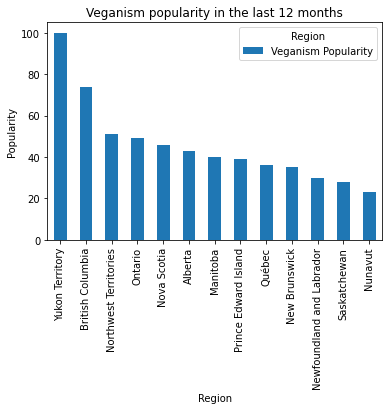

In [102]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_data_1.plot(kind = "bar")

plt.title("Veganism popularity in the last 12 months")
plt.xlabel("Region")
plt.ylabel("Popularity")

plt.show()

Well, what does the popularity value means?
According to Google Trends; "the values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term."

What is interesting to us is the popularity in British Columbia (Vancouver) and Ontario (Toronto)!

In the graph above we can see that the Veganism topic has a value considerably higher in British Columbia than in Ontario.


But what about the cities themselves? Let's get that data!

In [103]:
body = client_f1e33a4bb9914ba7bde17a9ef2b01aa7.get_object(Bucket='thebattleofneighborhoods-donotdelete-pr-zcpriuiecdv8bn',Key='geoMap canada vegan cities.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Category: All categories
City,Veganism: (3/26/20 - 3/26/21)
Whistler,NaN
Squamish,NaN
Courtenay,NaN
Victoria,100


This data also needs some cleaning! Its header is not properly set, aswell as the name of the "Veganism" column!

In addition to that, we can also see that it has some NaN values! Let's drop them at once!

In [104]:
df_data_2.columns = df_data_2.iloc[0]

df_data_2.drop(df_data_2.index[0], inplace = True)

In [105]:
df_data_2.rename(columns={"Veganism: (3/26/20 - 3/26/21)": "Veganism Popularity"}, inplace = True)

In [106]:
df_data_2.dropna(inplace = True)

df_data_2['Veganism Popularity'] = pd.to_numeric(df_data_2['Veganism Popularity'])


df_data_2.dtypes

City
Veganism Popularity    int64
dtype: object

In [107]:
df_data_2_filtered = df_data_2.loc[['Vancouver', 'Toronto']]

In [108]:
df_data_2_filtered

City,Veganism Popularity
Vancouver,88
Toronto,55


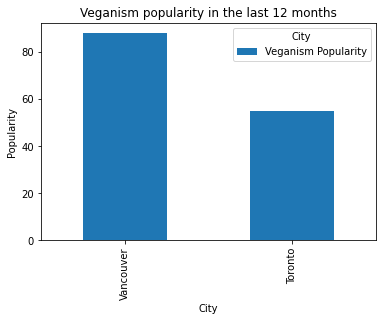

In [109]:
df_data_2_filtered.plot(kind = "bar")

plt.title("Veganism popularity in the last 12 months")
plt.xlabel("City")
plt.ylabel("Popularity")

plt.show()

Veganism is way more popular in Vancouver than in Toronto!